In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path

import unicodedata

In [2]:
WORDS_PATH = Path(".") / "dmklinger_words.json"

assert WORDS_PATH.exists()

In [3]:
%load_ext jupyter_black

In [4]:
df = pd.read_json(WORDS_PATH)

In [5]:
df.head()

,word,pos,defs,freq,info,forms,index
0,на,particle,[positioned at the upper surface of (prepositi...,2.0,,{},0
1,в,particle,"[contained by (preposition), (+ locative case)...",3.0,,{},1
2,у,particle,"[contained by (preposition), (+ locative case)...",4.0,,{},2
3,не,particle,[not],5.0,,{},3
4,з,particle,"[of (containing, comprising or made from) (pre...",6.0,,{},4


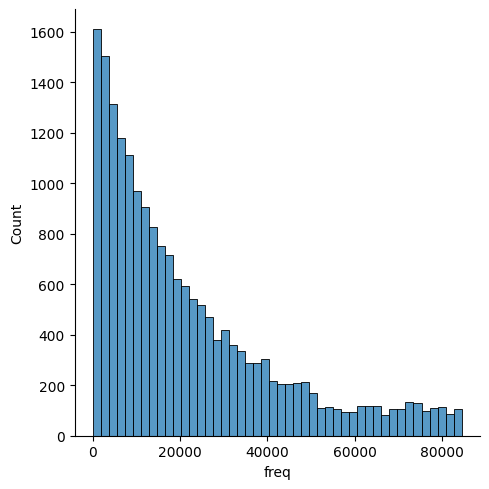

In [6]:
sns.displot(df.freq)

In [7]:
df.freq.describe()

count    19145.000000
mean     21594.330791
std      20216.122139
min          2.000000
25%       6053.000000
50%      15058.000000
75%      30880.000000
max      84543.000000
Name: freq, dtype: float64

In [8]:
df[df.freq.isna()]

,word,pos,defs,freq,info,forms,index
19145,а,particle,[and (used to string together sentences or sen...,NaN,,{},19145
19146,е,particle,"[The seventh letter of the Ukrainian alphabet,...",NaN,,{},19146
19147,ж,particle,"[The ninth letter of the Ukrainian alphabet, c...",NaN,,{},19147
19148,я,noun,"[ya (a letter of the Cyrillic alphabet ""Я/я""),...",NaN,,"{'nom n': ['я'], 'gen n': ['мене́', 'ме́не'], ...",19148
19149,є,phrase,[there are (third-person plural present indica...,NaN,,{},19149
...,...,...,...,...,...,...,...
30106,вла́да розбещувати а абсолютний вла́да розбещу...,proverb,"[power corrupts, absolute power corrupts absol...",NaN,,{},30106
30107,біда (лихо) навчить коржі з маком (коржі з сал...,proverb,[needs must when the devil drives (there is so...,NaN,,{},30107
30108,"ніко́ли не відкладати на за́втра те, що могти ...",proverb,[never put off until tomorrow what you can do ...,NaN,,{},30108
30109,Сполу́чене Королі́вство Вели́кої Брита́нії й П...,noun,[United Kingdom of Great Britain and Northern ...,NaN,"neuter, inanimate",{'nom ns': ['Сполу́чене Королі́вство Вели́кої ...,30109


In [9]:
df[df.freq.isna()].describe()

,freq,index
count,0.0,10966.00000
mean,NaN,24627.50000
std,NaN,3165.75586
min,NaN,19145.00000
25%,NaN,21886.25000
50%,NaN,24627.50000
75%,NaN,27368.75000
max,NaN,30110.00000


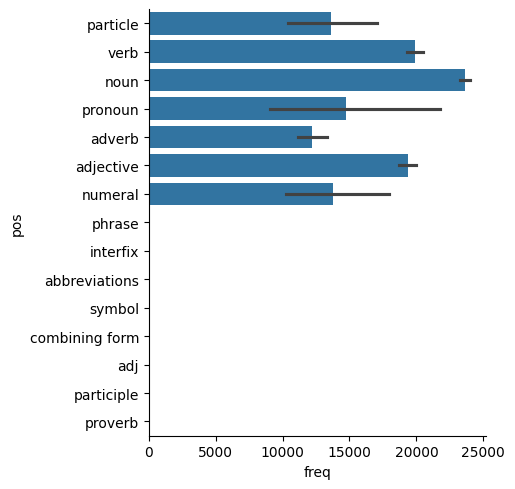

In [10]:
sns.catplot(df, y="pos", x="freq", kind="bar")

In [11]:
df.quantile(q=0.1)

freq     2203.4
index    3011.0
Name: 0.1, dtype: float64

In [12]:
pd.qcut(df.freq, 4)

0        (1.999, 6053.0]
1        (1.999, 6053.0]
2        (1.999, 6053.0]
3        (1.999, 6053.0]
4        (1.999, 6053.0]
              ...       
30106                NaN
30107                NaN
30108                NaN
30109                NaN
30110                NaN
Name: freq, Length: 30111, dtype: category
Categories (4, interval[float64, right]): [(1.999, 6053.0] < (6053.0, 15058.0] < (15058.0, 30880.0] < (30880.0, 84543.0]]

In [13]:
dfc = df[~df.freq.isna()].drop_duplicates("word")

In [14]:
dfc.loc[:, "freq_quantile"] = pd.qcut(dfc.freq, 10, labels=range(1, 11))

<Axes: xlabel='freq_quantile', ylabel='Count'>

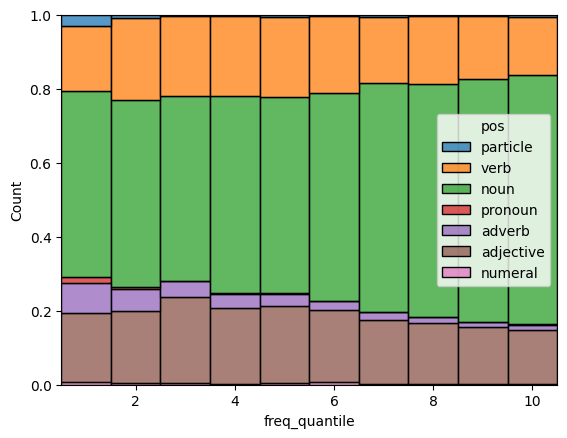

In [16]:
sns.histplot(dfc, hue="pos", x="freq_quantile", multiple="fill")

In [17]:
dfc.loc[:, "len"] = dfc.word.apply(lambda x: len(x))
dfc.loc[:, "len_quantile"] = pd.qcut(dfc.len, 3, labels=["short", "mid", "long"])
dfc.head()

,word,pos,defs,freq,info,forms,index,freq_quantile,len,len_quantile
0,на,particle,[positioned at the upper surface of (prepositi...,2.0,,{},0,1,2,short
1,в,particle,"[contained by (preposition), (+ locative case)...",3.0,,{},1,1,1,short
2,у,particle,"[contained by (preposition), (+ locative case)...",4.0,,{},2,1,1,short
3,не,particle,[not],5.0,,{},3,1,2,short
4,з,particle,"[of (containing, comprising or made from) (pre...",6.0,,{},4,1,1,short


In [18]:
letters = ["я́", "й"]
for l in letters:
    print(l, unicodedata.category(unicodedata.normalize("NFD", l)[-1]))
    print(l, unicodedata.category(unicodedata.normalize("NFC", l)[-1]))
    print(l, unicodedata.category(unicodedata.normalize("NFKD", l)[-1]))
    print(l, unicodedata.category(unicodedata.normalize("NFKC", l)[-1]))
    print("-")

я́ Mn
я́ Mn
я́ Mn
я́ Mn
-
й Mn
й Ll
й Mn
й Ll
-


In [19]:
# dfc.word.apply(lambda x: unicodedata.normalize("NFKD", x))
# dfc.word.apply(lambda x: unidecode.unidecode(x))
def strip_accents(unicode_string):
    """
    Strip accents (all combining unicode characters) from a unicode string.

    (From https://gist.github.com/rcalsaverini/30bb8212809d29592222)
    """
    # ndf_string = unicodedata.normalize("NFD", unicode_string)
    # Changing this to  C for the йs
    ndf_string = unicodedata.normalize("NFC", unicode_string)
    is_not_accent = lambda char: unicodedata.category(char) != "Mn"
    return "".join(char for char in ndf_string if is_not_accent(char))

In [20]:
# remoe stress
dfc.loc[:, "word_raw"] = dfc.word

In [21]:
# remoe stress
dfc.loc[:, "word"] = dfc.word.apply(lambda x: strip_accents(x))

In [22]:
dfc.loc[:, "word"] = dfc.word.apply(lambda x: x.lower())

In [23]:
dfc = dfc.drop_duplicates("word")

In [24]:
dfc.tail()

,word,pos,defs,freq,info,forms,index,freq_quantile,len,len_quantile,word_raw
19140,щурячий,adjective,[murine (characteristic of mice)],84433.0,,"{'nom am': ['щуря́чий'], 'nom af': ['щуря́ча']...",19140,10,8,short,щуря́чий
19141,юда,noun,[Judas (traitor)],84458.0,female,"{'nom ns': ['ю́да'], 'nom np': ['ю́ди'], 'gen ...",19141,10,4,short,ю́да
19142,юдейський,adjective,"[Jewish (of or relating to a Jew or Jews, thei...",84461.0,,"{'nom am': ['юде́йський'], 'nom an': ['юде́йсь...",19142,10,10,mid,юде́йський
19143,юристка,noun,"[attorney (lawyer), lawyer (professional perso...",84523.0,"female, animate","{'nom ns': ['юри́стка'], 'nom np': ['юри́стки'...",19143,10,8,short,юри́стка
19144,юрта,noun,"[yurt (large, round tent with vertical walls a...",84543.0,"female, inanimate","{'nom ns': ['ю́рта'], 'nom np': ['ю́рти'], 'ge...",19144,10,5,short,ю́рта


In [25]:
dfc.to_csv(f"./words.csv")

In [26]:
# OK so phrases etc. get removed because no frequency
dfc.pos.value_counts()

noun         10813
verb          3674
adjective     3527
adverb         633
particle       111
pronoun         57
numeral         55
Name: pos, dtype: int64

## Sampling

In [27]:
NUM_FROM_QUANTILE = 60
POS_NEEDED = [
    "noun",
    "verb",
    "adjective",
    "adverb",
]  # , "particle", "pronoun", "numeral"]

In [28]:
sampled_list = list()
num_needed = int(NUM_FROM_QUANTILE / len(POS_NEEDED))
for i, g in dfc[dfc.pos.isin(POS_NEEDED)].groupby(["freq_quantile", "pos"]):
    sdf = g.sample(num_needed)
    sampled_list.append(sdf)

In [30]:
sampled_list[0]

,word,pos,defs,freq,info,forms,index,freq_quantile,len,len_quantile,word_raw
1576,видатний,adjective,"[outstanding (standing out from others), outst...",1800.0,,"{'nom am': ['видатни́й'], 'nom an': ['видатне́...",1576,1,9,mid,видатни́й
1828,сусідній,adjective,[neighboring (Situated or living nearby or adj...,2104.0,,"{'nom am': ['сусі́дній'], 'nom an': ['сусі́днє...",1828,1,9,mid,сусі́дній
1503,грошовий,adjective,"[pecuniary (of or relating to money), (relatio...",1722.0,,"{'nom am': ['грошови́й'], 'nom an': ['грошове́...",1503,1,9,mid,грошови́й
1031,космічний,adjective,[cosmic (of or from or pertaining to the cosmo...,1178.0,,"{'nom am': ['космі́чний'], 'nom an': ['космі́ч...",1031,1,10,mid,космі́чний
1092,харківський,adjective,[(relational) Kharkiv],1249.0,,"{'nom am': ['ха́рківський'], 'nom af': ['ха́рк...",1092,1,12,long,ха́рківський
398,колишній,adjective,"[former (previous), former, previous, erstwhil...",480.0,,"{'nom am': ['коли́шній'], 'nom an': ['коли́шнє...",398,1,9,mid,коли́шній
1491,валютний,adjective,"[pecuniary (of or relating to money), (relatio...",1709.0,,"{'nom am': ['валю́тний'], 'nom an': ['валю́тне...",1491,1,9,mid,валю́тний
1687,справедливий,adjective,"[fair (just, equitable), righteous (justified ...",1941.0,,"{'nom am': ['справедли́вий'], 'nom an': ['спра...",1687,1,13,long,справедли́вий
1254,всеукраїнський,adjective,"[all-Ukrainian, Ukraine-wide]",1442.0,,"{'nom am': ['всеукраї́нський'], 'nom an': ['вс...",1254,1,15,long,всеукраї́нський
951,духовний,adjective,[spiritual (of or pertaining to the spirit or ...,1090.0,,"{'nom am': ['духо́вний'], 'nom an': ['духо́вне...",951,1,9,mid,духо́вний


In [32]:
ddf = pd.concat(sampled_list)
ddf

,word,pos,defs,freq,info,forms,index,freq_quantile,len,len_quantile,word_raw
1576,видатний,adjective,"[outstanding (standing out from others), outst...",1800.0,,"{'nom am': ['видатни́й'], 'nom an': ['видатне́...",1576,1,9,mid,видатни́й
1828,сусідній,adjective,[neighboring (Situated or living nearby or adj...,2104.0,,"{'nom am': ['сусі́дній'], 'nom an': ['сусі́днє...",1828,1,9,mid,сусі́дній
1503,грошовий,adjective,"[pecuniary (of or relating to money), (relatio...",1722.0,,"{'nom am': ['грошови́й'], 'nom an': ['грошове́...",1503,1,9,mid,грошови́й
1031,космічний,adjective,[cosmic (of or from or pertaining to the cosmo...,1178.0,,"{'nom am': ['космі́чний'], 'nom an': ['космі́ч...",1031,1,10,mid,космі́чний
1092,харківський,adjective,[(relational) Kharkiv],1249.0,,"{'nom am': ['ха́рківський'], 'nom af': ['ха́рк...",1092,1,12,long,ха́рківський
...,...,...,...,...,...,...,...,...,...,...,...
18675,родитися,verb,"[be born (come into existence through birth), ...",76238.0,imperfective or perfective,"{'pres': {'pp': {'adv': ['ро́дячись']}, '1s': ...",18675,10,9,mid,роди́тися
18356,опубліковувати,verb,[publish (to issue a medium (e.g. publication)...,71305.0,imperfective,"{'pres': {'pp': {'adv': ['опубліко́вуючи']}, '...",18356,10,15,long,опубліко́вувати
17487,втомлювати,verb,"[(transitive) to tire, to weary, to fatigue]",56196.0,imperfective,"{'pres': {'pp': {'adv': ['вто́млюючи']}, '1s':...",17487,10,11,long,вто́млювати
19100,чухрати,verb,[thrash (to beat mercilessly)],83747.0,imperfective,"{'imp': {'1p': ['чухра́ймо'], '2s': ['чухра́й'...",19100,10,8,short,чухра́ти


<Axes: xlabel='freq_quantile', ylabel='Count'>

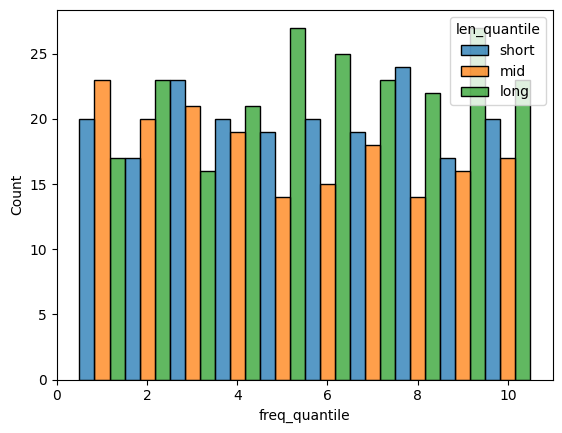

In [33]:
sns.histplot(ddf, hue="len_quantile", x="freq_quantile", multiple="dodge")

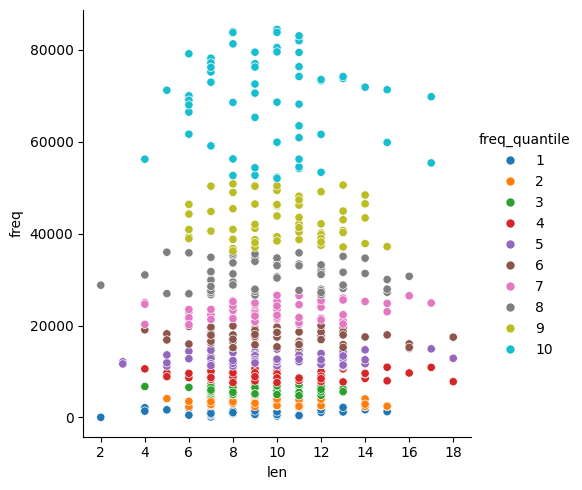

In [34]:
sns.relplot(ddf, x="len", y="freq", hue="freq_quantile")

In [35]:
ddf = ddf.drop(columns=["defs", "forms", "info"])
ddf["freq"] = ddf["freq"].astype(int)

In [36]:
ddf.to_csv("./sampled_words.csv", index=None)

In [39]:
x = pd.read_csv("./sampled_words.csv")
x

,word,pos,freq,index,freq_quantile,len,len_quantile,word_raw
0,територіальний,adjective,1018,889,1,15,long,територіа́льний
1,гострий,adjective,2115,1838,1,8,short,го́стрий
2,популярний,adjective,2165,1881,1,11,long,популя́рний
3,західний,adjective,628,529,1,9,mid,за́хідний
4,малий,adjective,699,594,1,6,short,мали́й
...,...,...,...,...,...,...,...,...
595,зсунутися,verb,61989,17817,10,10,mid,зсу́нутися
596,постачити,verb,74028,18552,10,10,mid,поста́чити
597,замостити,verb,60837,17731,10,10,mid,замости́ти
598,хвастатися,verb,82683,19033,10,11,long,хва́статися


In [41]:
mask = ddf["word"].isin(x["word"])
ddf_filtered = ddf[~mask]
ddf_filtered

,word,pos,freq,index,freq_quantile,len,len_quantile,word_raw
1576,видатний,adjective,1800,1576,1,9,mid,видатни́й
1828,сусідній,adjective,2104,1828,1,9,mid,сусі́дній
1503,грошовий,adjective,1722,1503,1,9,mid,грошови́й
1031,космічний,adjective,1178,1031,1,10,mid,космі́чний
1092,харківський,adjective,1249,1092,1,12,long,ха́рківський
...,...,...,...,...,...,...,...,...
18675,родитися,verb,76238,18675,10,9,mid,роди́тися
18356,опубліковувати,verb,71305,18356,10,15,long,опубліко́вувати
17487,втомлювати,verb,56196,17487,10,11,long,вто́млювати
19100,чухрати,verb,83747,19100,10,8,short,чухра́ти


In [42]:
ddf_filtered.to_csv("./sampled_words_fewshot.csv", index=None)

In [43]:
list(ddf_filtered.word.sort_values())

['абсолютно',
 'автоматизувати',
 'адамович',
 'адмініструвати',
 'аеродинамічний',
 'аквапарк',
 'апельсин',
 'арабський',
 'арамейський',
 'ароматний',
 'атом',
 'аудіовізуальний',
 'афганський',
 'баба',
 'багатобічний',
 'багнистий',
 'бакалавр',
 'банальний',
 'бацила',
 'бджола',
 'бежевий',
 'безвідповідально',
 "безголов'я",
 'бездоганний',
 'безладно',
 'безоглядний',
 'безпомічний',
 'безуспішний',
 'благословення',
 'блюдце',
 'богобоязкий',
 'божественність',
 'братовбивчий',
 'брухт',
 'буддистський',
 'бідувати',
 'білоцерківський',
 'більше',
 'біологічний',
 'валютний',
 'вапняковий',
 'ввести',
 'ввечері',
 'вгору',
 'вдихання',
 'великомасштабний',
 'велоспорт',
 'вербний',
 'вересневий',
 'веселитися',
 'вештатися',
 'виважено',
 'вигнутий',
 'виголошувати',
 'видатний',
 'викликати',
 'виключити',
 'виконати',
 'випадково',
 'високооплачуваний',
 'височина',
 'витлумачувати',
 'вкрасти',
 'внутрішньо',
 'водний',
 'всенародний',
 'всеохоплюючий',
 'всеукраїнський',
